In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(filepath_or_buffer='data/Cust_Segmentation.csv')

In [3]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
df.drop(
    columns=['Customer Id', 'Defaulted', 'Address'],
    axis=1,
    inplace=True
)

In [5]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 46.6 KB


In [7]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,41.300000


(7.5, -0.5)

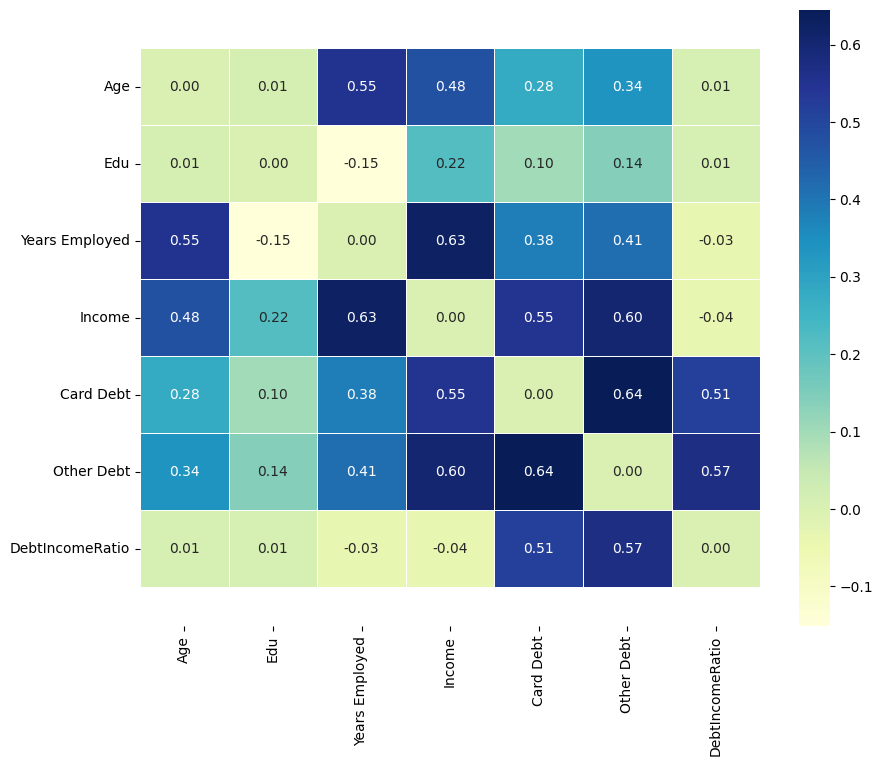

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
# örneğin age to age correlation 1 değeri ve grafik kafa karıştırıcı olabilir bu yüzden benzer features korelasyon değerine 0.0 basalım

for x in range(corr_matrix.shape[0]):
    corr_matrix.iloc[x,x] =0.0

fig, ax = plt.subplots(figsize=(10, 8));

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5
)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
corr_mat = df.corr()


for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] =0.0


corr_mat


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Age,0.000000,0.012983,0.554241,0.476218,0.278912,0.337839,0.008240
Edu,0.012983,0.000000,-0.151117,0.218219,0.099081,0.140938,0.008053
Years Employed,0.554241,-0.151117,0.000000,0.625093,0.381744,0.414430,-0.033625
Income,0.476218,0.218219,0.625093,0.000000,0.551510,0.603356,-0.035585
Card Debt,0.278912,0.099081,0.381744,0.551510,0.000000,0.644955,0.514971
Other Debt,0.337839,0.140938,0.414430,0.603356,0.644955,0.000000,0.572545
DebtIncomeRatio,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.000000


In [10]:
corr_max = corr_mat.abs().max().to_frame()
corr_max

,0
Age,0.554241
Edu,0.218219
Years Employed,0.625093
Income,0.625093
Card Debt,0.644955
Other Debt,0.644955
DebtIncomeRatio,0.572545


In [11]:
corr_id_max = corr_mat.abs().idxmax().to_frame()
corr_id_max

,0
Age,Years Employed
Edu,Income
Years Employed,Income
Income,Years Employed
Card Debt,Other Debt
Other Debt,Card Debt
DebtIncomeRatio,Other Debt


In [12]:
pair_features_corr = pd.merge(
    left=corr_id_max,
    right=corr_max,
    how='inner',
    on=corr_max.index
)

pair_features_corr

,key_0,0_x,0_y
0,Age,Years Employed,0.554241
1,Edu,Income,0.218219
2,Years Employed,Income,0.625093
3,Income,Years Employed,0.625093
4,Card Debt,Other Debt,0.644955
5,Other Debt,Card Debt,0.644955
6,DebtIncomeRatio,Other Debt,0.572545


In [13]:
pair_features_corr.rename(
    columns={
        'key_0' : 'Feature One',
        '0_x' : 'Feature Two',
        '0_y' : 'Correlation'
    },
    inplace=True
)

pair_features_corr

,Feature One,Feature Two,Correlation
0,Age,Years Employed,0.554241
1,Edu,Income,0.218219
2,Years Employed,Income,0.625093
3,Income,Years Employed,0.625093
4,Card Debt,Other Debt,0.644955
5,Other Debt,Card Debt,0.644955
6,DebtIncomeRatio,Other Debt,0.572545


In [14]:
pair_features_corr.sort_values(
    by='Correlation',
    ascending=False,
    inplace=True
)

pair_features_corr.reset_index(drop=True, inplace=True)

pair_features_corr

,Feature One,Feature Two,Correlation
0,Card Debt,Other Debt,0.644955
1,Other Debt,Card Debt,0.644955
2,Years Employed,Income,0.625093
3,Income,Years Employed,0.625093
4,DebtIncomeRatio,Other Debt,0.572545
5,Age,Years Employed,0.554241
6,Edu,Income,0.218219


In [15]:
skew_columns = (
    df.skew()
        .sort_values(ascending=False)
        .to_frame(name='Skewness')
)


skew_columns

,Skewness
Card Debt,3.701790
Income,3.700761
Other Debt,3.206006
Edu,1.216846
DebtIncomeRatio,1.124999
Years Employed,0.862663
Age,0.335037


In [16]:
from scipy.stats import yeojohnson

for column in df.columns:
    df[column], _ = yeojohnson(df[column])

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,4.951616,0.453202,2.840216,1.507858,0.111437,0.626937,2.509437
1,5.182606,0.380453,6.407868,1.733316,0.918998,1.437837,3.582696
2,4.595041,0.453202,3.844182,1.676480,0.972158,1.311535,4.463555
3,4.388895,0.453202,2.193816,1.507858,0.422483,0.381384,2.509437
4,5.182606,0.380453,6.995353,1.797798,1.035610,1.465512,2.694037


In [17]:
skew_columns = (
    df.skew()
        .sort_values(ascending=False)
        .to_frame(name='Skewness')
)

skew_columns

,Skewness
Edu,0.345990
Card Debt,0.149828
Income,0.070749
Other Debt,0.056789
Age,-0.008712
DebtIncomeRatio,-0.019181
Years Employed,-0.092692


In [18]:
from sklearn.cluster import KMeans

results = list()

for clust in range(1,11):
    km = KMeans(
        n_clusters=clust,
        random_state=42,
        n_init=10,
    )

    km.fit(df)

    results.append({
        'cluster' : clust,
        'inertia' : km.inertia_,
        'model' : km
    })


km_df = pd.DataFrame(results).set_index('cluster')

km_df

,inertia,model
cluster,,
1,3745.127890,"KMeans(n_clusters=1, n_init=10, random_state=42)"
2,1956.693928,"KMeans(n_clusters=2, n_init=10, random_state=42)"
3,1503.535649,"KMeans(n_clusters=3, n_init=10, random_state=42)"
4,1173.097710,"KMeans(n_clusters=4, n_init=10, random_state=42)"
5,985.051086,"KMeans(n_clusters=5, n_init=10, random_state=42)"
6,854.589223,"KMeans(n_clusters=6, n_init=10, random_state=42)"
7,751.028478,"KMeans(n_clusters=7, n_init=10, random_state=42)"
8,665.570524,"KMeans(n_init=10, random_state=42)"
9,604.698701,"KMeans(n_clusters=9, n_init=10, random_state=42)"


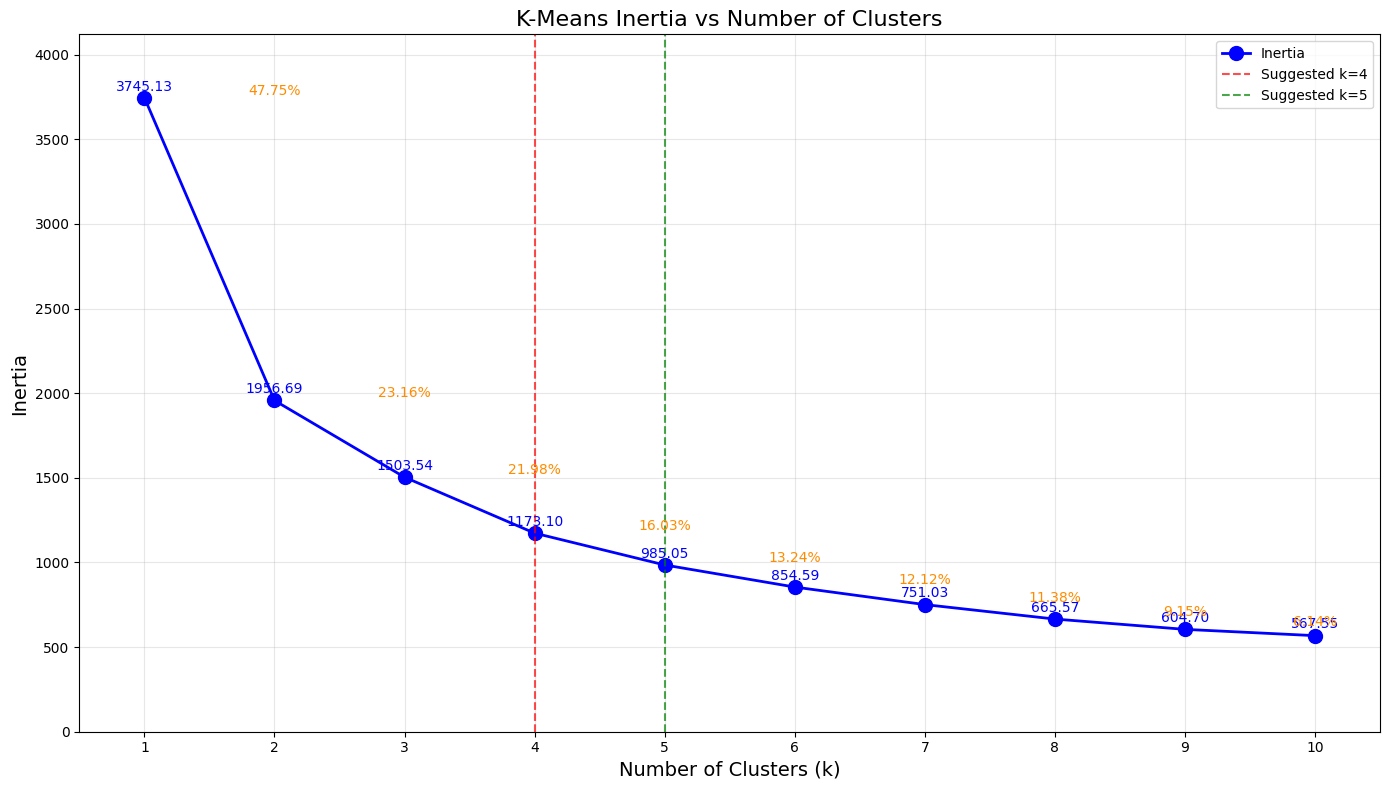

In [19]:
plt.figure(figsize=(14, 8))

line = plt.plot(
    km_df.index,
    km_df['inertia'],
    'bo-',
    markersize=10,
    linewidth=2,
    label='Inertia'
)

plt.xticks(km_df.index)

for x, y in zip(km_df.index, km_df['inertia']):
    plt.text(
        x=x,
        y=y + 25,
        s=f'{y:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='blue'  
    )

plt.axvline(x=4, color='red', linestyle='--', label='Suggested k=4', alpha=0.7)
plt.axvline(x=5, color='green', linestyle='--', label='Suggested k=5', alpha=0.7)

plt.title('K-Means Inertia vs Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.xlim(0.5, len(km_df) + 0.5)
plt.ylim(0, km_df['inertia'].max() * 1.1)

percentage_drops = [100 * (km_df['inertia'][i-1]-km_df['inertia'][i]) / km_df['inertia'][i-1] for i in range(2, len(km_df)+1)]

for i, pct in enumerate(percentage_drops, start=2):
    plt.text(
        x=i,
        y=km_df['inertia'][i-1] + 0.5,
        s=f'{pct:.2f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        color='darkorange'
    )

plt.tight_layout()
plt.show()


In [20]:
k_means = KMeans(
    init='k-means++',
    n_clusters=4,
    n_init=10,
    random_state=42
)


k_means.fit(df)

df['Cluster'] = k_means.labels_

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Cluster
0,4.951616,0.453202,2.840216,1.507858,0.111437,0.626937,2.509437,3
1,5.182606,0.380453,6.407868,1.733316,0.918998,1.437837,3.582696,1
2,4.595041,0.453202,3.844182,1.676480,0.972158,1.311535,4.463555,0
3,4.388895,0.453202,2.193816,1.507858,0.422483,0.381384,2.509437,3
4,5.182606,0.380453,6.995353,1.797798,1.035610,1.465512,2.694037,1


In [21]:
result = df.groupby('Cluster').mean()
result

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Cluster,,,,,,,
0,4.666561,0.420790,3.189954,1.613339,0.643972,1.104675,3.871078
1,4.957170,0.411807,5.275676,1.692276,0.654909,1.100013,2.924184
2,4.412593,0.428424,0.813492,1.546932,0.413453,0.755573,3.106701
3,4.602734,0.416170,3.240574,1.602289,0.308018,0.578453,1.976440


In [22]:
df['Cluster'].value_counts()

Cluster
3    217
0    217
2    213
1    203
Name: count, dtype: int64

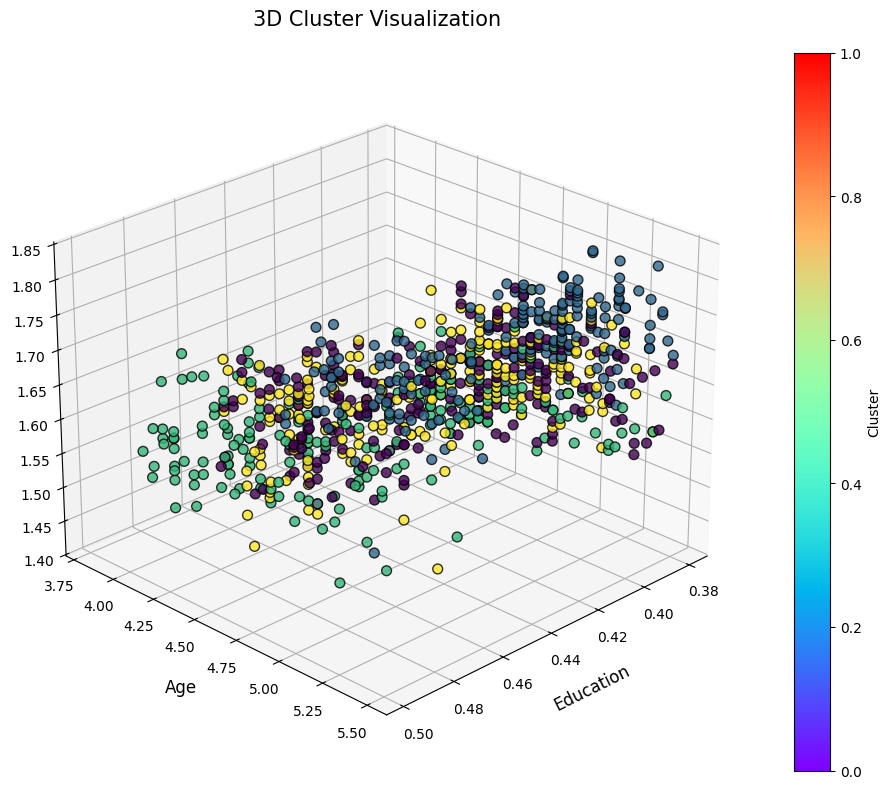

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.set_xlabel('Education', fontsize = 12, labelpad = 10)
ax.set_ylabel('Age', fontsize = 12, labelpad= 10)
ax.set_zlabel('Income', fontsize = 12, labelpad = 10)
ax.set_title('3D Cluster Visualization', fontsize = 15, pad = 20)

df_array = df.values

ax.scatter(
    df_array[:, 1],
    df_array[:, 0],
    df_array[:, 3],
    c=k_means.labels_,
    s=50,
    cmap='viridis',
    alpha = 0.8,
    edgecolor = 'k'
)


ax.view_init(elev = 25, azim = 45)

scatter = ax.scatter([], [], [], c=[], cmap = 'rainbow')

plt.colorbar(scatter, ax=ax, label = 'Cluster')

plt.tight_layout()
plt.show()